In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transform for MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(mnist, batch_size=64, shuffle=True)

# Define the generator network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(100, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input).view(-1, 1, 28, 28)

# Define the discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, input):
        input = input.view(-1, 28*28)
        return self.main(input)

# Instantiate the networks
generator = Generator()
discriminator = Discriminator()

# Loss function
criterion = nn.BCELoss()

# Optimizers
optimizer_g = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002)

# Training loop
for epoch in range(50):
    for i, (images, _) in enumerate(dataloader):
        # Train Discriminator with real images
        optimizer_d.zero_grad()
        real_data = images
        real_target = torch.ones(images.size(0), 1)
        output_real = discriminator(real_data)
        loss_real = criterion(output_real, real_target)

        # Train Discriminator with fake images
        noise = torch.randn(images.size(0), 100)
        fake_data = generator(noise)
        fake_target = torch.zeros(images.size(0), 1)
        output_fake = discriminator(fake_data.detach())
        loss_fake = criterion(output_fake, fake_target)

        # Backpropagation and optimization
        loss_d = loss_real + loss_fake
        loss_d.backward()
        optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()
        output_fake = discriminator(fake_data)
        loss_g = criterion(output_fake, real_target)
        loss_g.backward()
        optimizer_g.step()

    print(f'Epoch [{epoch+1}/50], Loss D: {loss_d.item()}, Loss G: {loss_g.item()}')


# Save Generator and Discriminator models
torch.save(generator.state_dict(), 'generator.pth')
torch.save(discriminator.state_dict(), 'discriminator.pth')






100%|██████████| 9912422/9912422 [00:00<00:00, 74052713.67it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 86340480.27it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 19399142.78it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14132439.74it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/50], Loss D: 1.058260440826416, Loss G: 1.2073715925216675
Epoch [2/50], Loss D: 1.018424391746521, Loss G: 1.0803309679031372
Epoch [3/50], Loss D: 0.6398129463195801, Loss G: 2.643383741378784
Epoch [4/50], Loss D: 0.25381630659103394, Loss G: 2.701105833053589
Epoch [5/50], Loss D: 0.30313199758529663, Loss G: 3.4466981887817383
Epoch [6/50], Loss D: 0.6389989852905273, Loss G: 2.1442763805389404
Epoch [7/50], Loss D: 0.5832289457321167, Loss G: 2.415566921234131
Epoch [8/50], Loss D: 0.4975493848323822, Loss G: 1.9170628786087036
Epoch [9/50], Loss D: 0.902823805809021, Loss G: 1.6121703386306763
Epoch [10/50], Loss D: 0.8914933204650879, Loss G: 2.082759380340576
Epoch [11/50], Loss D: 0.642119824886322, Loss G: 1.8645617961883545
Epoch [12/50], Loss D: 0.9381673336029053, Loss G: 1.8242497444152832
Epoch [13/50], Loss D: 0.6631724238395691, Loss G: 1.5413672924041748
Epoch [14/50], Loss D: 1.17576

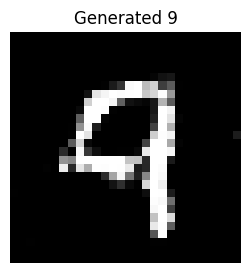

In [6]:

# Function to generate and save images
def generate_digit(generator, digit):
    noise = torch.randn(1, 100)
    generated_image = generator(noise)

import matplotlib.pyplot as plt
import torchvision.utils as vutils

# Function to generate and display images
def generate_and_display(generator, digit):
    noise = torch.randn(1, 100)
    generated_image = generator(noise)
    generated_image = generated_image.view(-1, 28, 28).detach().numpy()
    plt.figure(figsize=(3, 3))
    plt.imshow(generated_image[0], cmap='gray')
    plt.axis('off')
    plt.title(f"Generated {digit}")
    plt.show()

# Generate a digit and display it
generate_and_display(generator, 9)  


In [4]:
# Create a new instance of the Generator
saved_generator = Generator()

# Load the saved parameters into the new instance
saved_generator.load_state_dict(torch.load('generator.pth'))
saved_generator.eval()  # Set the model to evaluation mode


Generator(
  (main): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)